In [1]:
import pandas as pd
dataset = pd.read_csv("rawpvr_2018-02-01_28d_1083 TueFri.csv", index_col = False)
dataset.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,0,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,0,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,0,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,0,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,0,NaN


In [2]:
dataset.info()
type(dataset.Date[0]) # 确认数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503768 entries, 0 to 503767
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            503768 non-null  object 
 1   Lane            503768 non-null  int64  
 2   Lane Name       503768 non-null  object 
 3   Direction       503768 non-null  int64  
 4   Direction Name  503768 non-null  object 
 5   Speed (mph)     503749 non-null  float64
 6   Headway (s)     493776 non-null  float64
 7   Gap (s)         489693 non-null  float64
 8   Flags           503768 non-null  int64  
 9   Flag Text       0 non-null       float64
dtypes: float64(4), int64(3), object(3)
memory usage: 38.4+ MB


str

In [3]:
dataset['Date'].value_counts()

2018-02-06 18:04:51.050000    4
2018-02-16 17:22:24.050000    4
2018-02-13 09:05:21.010000    4
2018-02-13 17:21:23.010000    4
2018-02-23 08:34:04.070000    4
                             ..
2018-02-09 16:29:45.010000    1
2018-02-16 07:49:36.080000    1
2018-02-06 14:27:29.090000    1
2018-02-16 07:36:10.050000    1
2018-02-23 15:00:32.030000    1
Name: Date, Length: 484874, dtype: int64

In [4]:
from datetime import datetime
# print(str(dataset.Date.apply(lambda s: s[:19])))
# print(dataset.Date)
dataset['Flags'] = dataset['Date'].apply(lambda s : datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S").weekday()+1)

In [5]:
dataset.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,5,NaN
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,5,NaN
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,5,NaN
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,5,NaN
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,5,NaN


In [6]:
week_day_dict = {
        1: 'Monday', 
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday',
        7: 'Sunday',
}

dataset['Flag Text'] = dataset['Flags'].apply(lambda s : week_day_dict[s])

In [7]:
dataset.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,5,Friday


In [8]:
traffic_volume = {}
dataset['Flags'].value_counts()

5    255751
2    248017
Name: Flags, dtype: int64

In [9]:
traffic_volume['Tue'] = dataset['Flags'].value_counts()[2]
traffic_volume['Fri'] = dataset['Flags'].value_counts()[5]

In [10]:
traffic_volume

{'Tue': 248017, 'Fri': 255751}

In [11]:
# create a column to describe time（hour）
dataset['Hours'] = dataset['Date'].apply(lambda s : datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S").hour)
dataset.describe()

,Lane,Direction,Speed (mph),Headway (s),Gap (s),Flags,Hours
count,503768.000000,503768.000000,503749.000000,493776.000000,489693.000000,503768.000000,503768.000000
mean,3.577770,1.499293,31.708125,6.828993,6.404432,3.523028,13.198242
std,1.787199,0.500000,7.847538,11.965522,12.038498,1.499825,4.750324
min,1.000000,1.000000,1.244000,0.053000,0.001000,2.000000,0.000000
25%,2.000000,1.000000,27.962000,1.916000,1.340000,2.000000,9.000000
50%,3.000000,1.000000,32.310000,3.012000,2.475000,5.000000,14.000000
75%,5.000000,2.000000,36.039000,6.300000,6.013000,5.000000,17.000000
max,6.000000,2.000000,121.168000,292.300000,291.855000,5.000000,23.000000


In [12]:
dataset.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,Hours
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday,0
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday,0
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday,0
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday,0
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,5,Friday,0


In [13]:
# create a label for day(date without time)
dataset['Day_of_the_month'] = dataset['Date'].apply(lambda s : datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S").day)

In [14]:
dataset.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,Hours,Day_of_the_month
0,2018-02-02 00:00:03.050000,6,SB_NS,2,South,38.525,NaN,NaN,5,Friday,0,2
1,2018-02-02 00:00:22.010000,5,SB_MID,2,South,32.310,NaN,NaN,5,Friday,0,2
2,2018-02-02 00:00:22.020000,4,SB_OS,2,South,44.739,NaN,NaN,5,Friday,0,2
3,2018-02-02 00:00:36.040000,6,SB_NS,2,South,33.554,NaN,NaN,5,Friday,0,2
4,2018-02-02 00:00:49.070000,6,SB_NS,2,South,39.768,12.3,11.847,5,Friday,0,2


In [15]:
tmp = dataset.loc[dataset["Flags"] == 2]
tmp = tmp.loc[dataset['Hours'] == 9]
tmp = tmp.loc[dataset['Direction'] == 1]
traffic_volume_for_Tue = tmp.groupby(['Day_of_the_month']).size()

In [16]:
traffic_volume_for_Tue

Day_of_the_month
6     2537
13    2447
20    2311
27    2426
dtype: int64

In [17]:
traffic_volume_for_Tue.rename('volume', inplace=True)

Day_of_the_month
6     2537
13    2447
20    2311
27    2426
Name: volume, dtype: int64

In [18]:
traffic_volume_for_Tue.describe()

count       4.000000
mean     2430.250000
std        92.942186
min      2311.000000
25%      2397.250000
50%      2436.500000
75%      2469.500000
max      2537.000000
Name: volume, dtype: float64

In [19]:
volume_range = max(traffic_volume_for_Tue) - min(traffic_volume_for_Tue)

In [20]:
volume_range

226

In [21]:
interquartile_range = traffic_volume_for_Tue.quantile(0.75) - traffic_volume_for_Tue.quantile(0.25)

In [22]:
interquartile_range

72.25

In [23]:
# 每个小时的平均车流量 按照小时算，然后/4
north_volume_per_hour = dataset.loc[dataset['Flags'] == 2].loc[dataset['Direction'] == 1].groupby(['Hours']).size()

In [24]:
north_volume_per_hour /= 4

In [25]:
south_volume_per_hour = dataset.loc[dataset['Flags'] == 2].loc[dataset['Direction'] == 2].groupby(['Hours']).size()

In [26]:
south_volume_per_hour /= 4

<IPython.core.display.Javascript object>


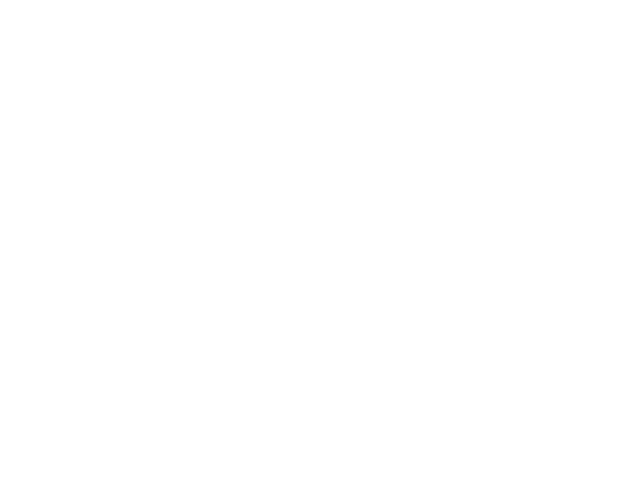

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook
north_volume_per_hour.plot.bar(x="Hours", title="volume for north")
for i, v in enumerate(north_volume_per_hour):
    plt.text(i-0.5, v + 1, str(v), fontsize=7)
plt.tight_layout()

In [28]:


south_volume_per_hour.plot.bar(x="Hours", title="volume for south")
for i, v in enumerate(south_volume_per_hour):
    plt.text(i-0.5, v + 1, str(v), fontsize=7)
plt.tight_layout()

<IPython.core.display.Javascript object>

In [34]:

tmp = condition.drop(['Hours', 'Day_of_the_month'], axis=1)
tmp.head()

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text
68516,2018-02-06 07:00:00.100000,3,NB_OS,1,North,32.310,3.462,NaN,2,Tuesday
68517,2018-02-06 07:00:01.160000,2,NB_MID,1,North,27.962,1.720,NaN,2,Tuesday
68518,2018-02-06 07:00:03,2,NB_MID,1,North,27.962,2.480,1.992,2,Tuesday
68519,2018-02-06 07:00:03.020000,4,SB_OS,2,South,47.846,NaN,NaN,2,Tuesday
68520,2018-02-06 07:00:03.030000,1,NB_NS,1,North,27.340,4.418,NaN,2,Tuesday


In [ ]:

Rows_Completeness = tmp.apply(lambda row: (len(row) - row.isna().sum()) * 100 / len(row), axis=1)
Rows_Completeness

In [46]:
rows_empty = tmp.loc[tmp.isnull().any(axis=1)]

In [47]:
len(rows_empty)

3958

In [44]:
Another_Rows_Completeness = (len(tmp) - len(non_empty)) * 100 / len(tmp)
Another_Rows_Completeness

98.03206960845246

In [ ]:
Rows_Completeness.mean()

In [30]:
# use a dictionary to store the Column Completeness.
Column_Completeness = {}

# get all Tuesday
condition = dataset.loc[dataset['Flags'] == 2]

# get the time between 7:00 - 19:00. 'Flags' refers to the day of the week, which has been gotten in task 1.
condition = condition.loc[(condition['Hours'] >= 7) & (condition['Hours'] < 19)]

# get the quality assessment of the level of completeness of the 'Gaps(s)'.
# condition['Gap (s)'].count() is used for calculating the non-empty value of 'Gap (s)'
# condition['Gap (s)'].size is used for getting number of the cells.
Column_Completeness['Gap (s)'] = condition['Gap (s)'].count() * 100 / condition['Gap (s)'].size

# get the quality assessment of the level of completeness of the 'Headways(s)'. 'Hours' refers to the hours of a day, which I defined in task 2.
# condition['Headway (s)'].icount() is used for calculating the non-empty value of 'Headway (s)'
# condition['Headway (s)'].size is used for getting number of the cells.
Column_Completeness['Headway (s)'] = condition['Headway (s)'].count() * 100 / condition['Headway (s)'].size

# show the result
Column_Completeness

{'Gap (s)': 98.03654443753885, 'Headway (s)': 98.96532007458049}

In [31]:
dataset.loc[(dataset['Hours'] == 9) & (dataset['Lane Name'] == 'NB_MID') & (pd.isna(dataset['Gap (s)'])) & (pd.isna(dataset['Headway (s)']))]

,Date,Lane,Lane Name,Direction,Direction Name,Speed (mph),Headway (s),Gap (s),Flags,Flag Text,Hours,Day_of_the_month
14525,2018-02-02 09:10:39.070000,2,NB_MID,1,North,33.554,NaN,NaN,5,Friday,9,2
14845,2018-02-02 09:15:20.080000,2,NB_MID,1,North,39.768,NaN,NaN,5,Friday,9,2
15236,2018-02-02 09:21:01.060000,2,NB_MID,1,North,42.253,NaN,NaN,5,Friday,9,2
15550,2018-02-02 09:25:18.050000,2,NB_MID,1,North,34.798,NaN,NaN,5,Friday,9,2
15877,2018-02-02 09:30:22.020000,2,NB_MID,1,North,38.525,NaN,NaN,5,Friday,9,2
16523,2018-02-02 09:40:23.060000,2,NB_MID,1,North,29.825,NaN,NaN,5,Friday,9,2
17457,2018-02-02 09:55:21,2,NB_MID,1,North,43.495,NaN,NaN,5,Friday,9,2
79658,2018-02-06 09:10:32.020000,2,NB_MID,1,North,33.554,NaN,NaN,2,Tuesday,9,6
80829,2018-02-06 09:25:54.080000,2,NB_MID,1,North,38.525,NaN,NaN,2,Tuesday,9,6
81465,2018-02-06 09:35:29,2,NB_MID,1,North,31.691,NaN,NaN,2,Tuesday,9,6


In [32]:
# get the lane named NB_MID
NB_MID = dataset.loc[dataset['Lane Name'] == 'NB_MID']

# get Tuesday
NB_MID = NB_MID.loc[NB_MID['Flags'] == 2]

# get the median between 7:00 - 19:00
NB_MID_median = NB_MID.loc[(NB_MID['Hours'] >= 7) & (NB_MID['Hours'] < 19)].groupby(['Hours']).median()
NB_MID_median

,Lane,Direction,Speed (mph),Headway (s),Gap (s),Flags,Day_of_the_month
Hours,,,,,,,
7,2,1,19.2620,2.7220,1.8340,2,13
8,2,1,15.2235,3.1910,2.1020,2,20
9,2,1,28.5840,2.7200,2.0800,2,13
10,2,1,31.6910,3.0000,2.5835,2,13
11,2,1,32.3100,3.2100,2.7785,2,13
12,2,1,32.3100,3.1600,2.7950,2,13
13,2,1,32.3100,3.1020,2.7560,2,13
14,2,1,32.3100,3.1330,2.8050,2,13
15,2,1,31.6910,2.9200,2.5770,2,20


In [33]:
NB_MID_median.head()

,Lane,Direction,Speed (mph),Headway (s),Gap (s),Flags,Day_of_the_month
Hours,,,,,,,
7,2,1,19.2620,2.722,1.8340,2,13
8,2,1,15.2235,3.191,2.1020,2,20
9,2,1,28.5840,2.720,2.0800,2,13
10,2,1,31.6910,3.000,2.5835,2,13
11,2,1,32.3100,3.210,2.7785,2,13


In [ ]:
def fill_median_of_gaps(x):
    if x['Lane Name'] != 'NB_MID' or not pd.isna(x['Gap (s)']) or x['Hours'] >= 19 or x['Hours'] < 7:
        return x
    x['Gap (s)'] = NB_MID_median.loc[int(x['Hours'])]['Gap (s)']
    return x

dataset = dataset.apply(fill_median_of_gaps, axis=1)

In [ ]:
dataset.loc[(dataset['Hours'] == 7) & (dataset['Lane Name'] == 'NB_MID')]

In [ ]:
def fill_median_of_headways(x):
    if x['Lane Name'] != 'NB_MID' or not pd.isna(x['Headway (s)']) or x['Hours'] >= 19 or x['Hours'] < 7:
        return x
    x['Headway (s)'] = NB_MID_median.loc[int(x['Hours'])]['Headway (s)']
    return x

dataset = dataset.apply(fill_median_of_headways, axis=1)

In [ ]:
dataset.loc[[3947, 4249, 4561]]

In [ ]:
dataset.loc[(dataset['Hours'] == 7) & (dataset['Lane Name'] == 'NB_MID') & (pd.isna(dataset['Gap (s)'])) & (pd.isna(dataset['Headway (s)']))]

In [ ]:
# find the data on Tuesday
condition_for_avg_speed = dataset.loc[dataset['Flags'] == 5]

# find the data that between 17:00 - 18:00
condition_for_avg_speed = condition_for_avg_speed.loc[dataset['Hours'] == 17]

# find the data that direction is north
condition_for_avg_speed = condition_for_avg_speed.loc[dataset['Direction'] == 1]

# get the average speed of 1083 
avg_1083 = condition_for_avg_speed.groupby(['Lane']).mean()

In [ ]:
avg_1083

In [ ]:
data_1415 = pd.read_csv("rawpvr_2018-02-01_28d_1415 TueFri.csv", index_col = False)
data_1415.head()

In [ ]:
# create a column to describe hour
data_1415['Hours'] = data_1415['Date'].apply(lambda s : datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S").hour)

# get the Flags
data_1415['Flags'] = data_1415['Date'].apply(lambda s : datetime.strptime(s[:19], "%Y-%m-%d %H:%M:%S").weekday()+1)

In [ ]:
data_1415.loc[data_1415['Hours'] == 17]

In [ ]:
# find the data on Friday
condition_for_avg_speed = data_1415.loc[data_1415['Flags'] == 5]

# find the data that between 17:00 - 18:00
condition_for_avg_speed = condition_for_avg_speed.loc[data_1415['Hours'] == 17]

# find the data that direction is north
condition_for_avg_speed = condition_for_avg_speed.loc[data_1415['Direction'] == 1]

# get the average speed of 1415 
avg_1415 = condition_for_avg_speed.groupby(['Lane']).mean()

In [ ]:
avg_1415

In [ ]:
avg_speed = (avg_1083['Speed (mph)'].sum() + avg_1415['Speed (mph)'].sum()) / 5
avg_speed

In [ ]:
avg_speed *= 1.6
avg_speed

In [ ]:
# distance is given in task
distance = 4.86

time = distance / avg_speed

# get the result in minutes
time *= 60

In [ ]:
time

In [ ]:
# row.isna() means the cells that are missing. So len(row) - row.isna().sum() stands for the non-empty cells.
# len(row) can get all the cells in one row.
Rows_Completeness = tmp.apply(lambda row: (len(row) - row['Speed (mph)'].isna() - row['Headway (s)'].isna()) * 100 / len(row), axis=1)

In [ ]:
Rows_Completeness

In [ ]:
Rows_Completeness.mean()